# The Chaos of History (part 2)

In a [previous post](https://samgrayson.me/2016-07-21-chaos-of-history-1/), I talked about how a few random events can greatly change history. In this post, I will describe that idea more mathematically.

### A Gedanken

Let’s say I throw a rock straight up into the air and measure how far away it falls 10000 times. (I have too much free time.) I can plot that distance against the number of falls. You would expect most of them to fall very close to where I threw the rock. You would expect far-away falls to be pretty rare.

We might suggest that this fits a Gaussian distribution (that’s what most people associate bell-curve). Most physical phenomena roughly follow a Gaussian distribution. Towards the far right, the probability is very small. It should be rare that I would toss a rock straight up in the air and see it land 20 meters away. The far left and far right are called the ‘tails’ of the distribution.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm, uniform
res = 200
mag = 4

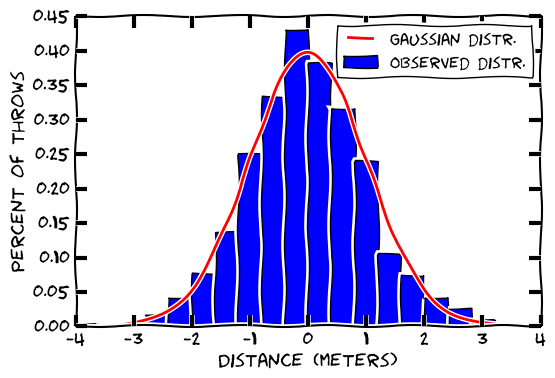

In [5]:
with plt.xkcd():
    # make some random data
    num_samples = 1000
    samples = [norm.rvs() for _ in range(num_samples)]

    # make the histogram
    plt.hist(samples, bins=20, range=(-mag, mag), normed=True, label='Observed distr.')

    # make the gaussian curve
    x = np.linspace(-mag, mag, res)
    plt.plot(x, norm.pdf(x), label='Gaussian distr.')

    # label the graph
    plt.xlabel('Distance (meters)')
    plt.ylabel('Percent of throws')
    plt.legend(fontsize=12)
    plt.show()

### Haphazard stroll

Now let’s say I throw the rock in the air, but this time I walk to where it landed and throw the rock in the air again from that point. This is called a [random walk](https://en.wikipedia.org/wiki/Random_walk), and here is what it looks like when the rock falls based on a Gaussian distribution. For good measure, I will run 5 random walks starting from different spots in different colors.

In [6]:
def to2D(f1D):
    '''Takes a random number generator and returns
    a random 2D position generator'''
    
    def random2D(**kwargs):
        theta = uniform.rvs(scale=np.pi)
        r = f1D.rvs(**kwargs)
        return np.array([r * np.cos(theta), r * np.sin(theta)])
    return random2D

def random_walk(r, n, iterations, bounds, size=2, space=1):
    plt.figure(figsize=(0.5*(n+1)*size*space, size))
    
    for i in range(n):
        np.random.seed(i) # (for deterministic results)
        positions = np.zeros((iterations, 2))
        
        # starting position
        positions[0][0] = i * bounds * space

        for i in range(1, iterations):
            # throw rock from last position
            positions[i] = positions[i - 1] + r()
            
        plt.plot(*positions.T)

    plt.xlim(-bounds, bounds * n * space)
    plt.ylim(-bounds, bounds)
    plt.show()

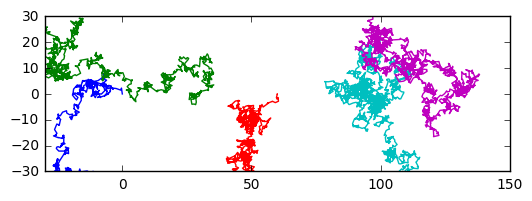

In [7]:
iterations = 2000
bounds = 30

norm2D = to2D(norm)
random_walk(norm2D, 5, iterations, bounds)

But I want to talk about another distribution: the Cauchy distribution. It is very similar to the Gaussian distribution, but it is ever-so-slightly higher at the tails (hence it is called a fat-tailed distribution). This means that extreme events are still rare, but slightly less rare.

But I want to talk about another distribution: the Cauchy distribution. It is very similar to the Gaussian distribution, but it is ever-so-slightly higher at the tails (hence it is called a [fat-tailed distribution](https://en.wikipedia.org/wiki/Fat-tailed_distribution)). This means that extreme outcomes are still rare, but slightly less rare. People often too quick to assume that a bell-curve shaped distributions are Gaussian, as [some would argue](http://rocketscienceofwallstreet.blogspot.com/2012/04/nassim-nicholas-taleb-against-gaussian.html).

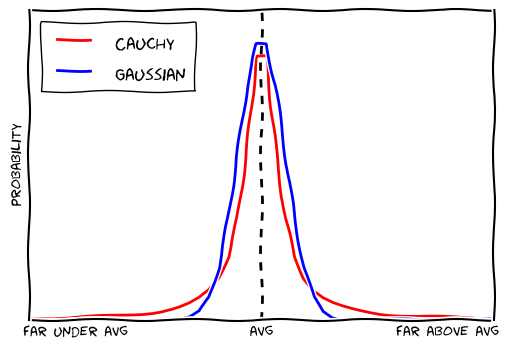

In [9]:
mag = 10
with plt.xkcd():
    x = np.linspace(-mag, mag)
    plt.plot(x, cauchy.pdf(x*1.3) / cauchy.pdf(0), 'r', label='Cauchy')
    plt.plot(x, norm.pdf(x) / norm.pdf(0), 'b', label='Gaussian')
    plt.legend(loc='upper left')
    plt.tick_params(axis='both', which='both', bottom='off', top='off', right='off', left='off', labelleft='off')
    plt.xticks([-mag * 0.8, 0, mag * 0.8], ['far under avg', 'avg', 'far above avg'])
    plt.ylim(0, 1.1)
    plt.plot([0, 0], [0, 1.1], 'k--')
    plt.ylabel('probability')

But the difference seems small. Let’s see how these distributions differ in a real experiment. I’ll take a random walk using the Cauchy distribution and look at the differences

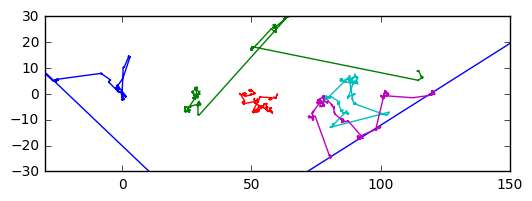

In [6]:
cauchy2D = to2D(cauchy(scale=2e-2))
random_walk(cauchy2D, 5, iterations, bounds)

In the Gaussian random walk, no single rock-throw really moved us far from the
origin. None of the throw were really 'out there'. In each Cauchy random walk,
most of the throws didn't affect the outcome that much, but there were one or two
really impactful throws that did most of the moving (especially in the blue and
green random walk). Outliers are still rare, but when they do occur, they are
**hugely influential**.


### The historical analogy

I suggest that many historical phenomena act have analogous behavior. One example
might be, the assassination of Arch Duke Franz Ferdinand; another might be the
Gulf of Tonkin incident, 9/11, or the battle of Thermopylae.

There _are_ historical trends and forces, but they are often realized by single
explosive events. There was a general trend of anti-imperialism in the early
twentieth century. Even though most movements of that trend were minor, it only
took one explosive assassination to change world history irrevocably.


### Looking to the future

The *average value* of a Gaussian or Cauchy distribution is zero (move neither
to the left or to the right). *On average*, when we throw the rock straight up,
it lands on top of me. The left moves will cancel out the right moves and it
will end up not far from where starts (the distribution is symmetric). The
*average* may be easy to predict, but *reality* might be different.

In the Gaussian random walk, most of the moves are medium. In the Cauchy most of
the moves are very small, or very large. A few very extreme moves cause most of
the movement away from the expected value. As a result, the average predicts
reality quite poorly. It would have been completely debunked by any one of those
extreme moves.

This is why markets are so difficult to predict. There are a few unpredictable
and extreme events which cause most of the movement (called "black swan
events"). On average, prices are constant or increasing steadily (due to
inflation), but then the OPEC declares an embargo and the price of oil becomes
300% larger. Or hurricane Katrina hits. That is an unlikely and extreme event
that screws up the models.
[Some argue](https://dollarvigilante.com/blog/2016/08/09/nassim-taleb-warns-biggest-black-swan-event-coming.html)
that lack of recognition of black swan events played a part in causing the
recession of '07.


Should we try harder to predict black swan events with models? There will never
be enough data-points to do useful analysis of them because of their
characteristic rarity. The best we can do is remember that every model is
fallible and engineer the robustness necessary to handle that fallibility.

Don't confuse unlikely with impossible.
